In [168]:
import pandas as pd
import os
import numpy as np
from pandas import DataFrame,Series
import sklearn
import matplotlib as mpl

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml(name='mnist_784',version=1,as_frame=False)

mnist_as_frame=fetch_openml(name='mnist_784',version=1)


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist_as_frame.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [6]:
mnist_as_frame['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [7]:
mnist['data']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
mnist_as_frame['data'].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X,y=mnist['data'],mnist['target']

In [10]:
X.shape

(70000, 784)

In [11]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [12]:
X[0].reshape(28,28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [13]:
DataFrame(X[0]).T

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X_frame,y_frame=mnist_as_frame['data'],mnist_as_frame['target']

In [15]:
X_frame.iloc[:1,:].values

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

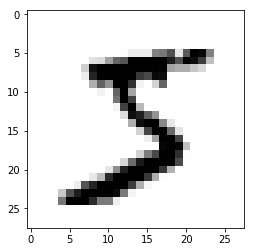

In [16]:
###so we are going to plot them out 
##so you understand it better 

some_data=X[0]
some_digit_image=X[0].reshape(28,28)

plt.imshow(some_digit_image,cmap=mlp.cm.binary,interpolation='nearest')

In [17]:
y[0]

'5'

In [18]:
y.shape

(70000,)

In [19]:
y=y.astype(np.uint8)

In [20]:
y[0]

5

In [21]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [22]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [23]:
y_train==5

array([ True, False, False, ...,  True, False, False])

In [24]:
y_train_5= (y_train==5) ###gives as a boolean

In [25]:
y_test_5= (y_test==5)###3 y test of 5

In [31]:
some_data=X[0] ####this represents 5

In [27]:
some_data.reshape(-1,1).shape

(784, 1)

In [28]:
some_data=[some_data]

In [29]:
from sklearn.linear_model import SGDClassifier

sgdcl= SGDClassifier(random_state=42)

sgdcl.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [32]:
sgdcl.predict([some_data])

array([ True])

# Performance Measure 

In [33]:
#good way to evaluate a model is to use cross-validation

###Ocassionally we will need to use more than what cross_val from sklearn gives us 
###this is ones in a while 
##so lets see how we can get our own process of the cross-val
##then we go back to the cross_Val 
##then use it an see

##Implementing Cross-Val

from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold

strfold=StratifiedKFold(n_splits=3,random_state=42,shuffle=True)


for train_index,test_index in strfold.split(X_train,y_train_5):
    print('TRAIN:',train_index,'Test:',test_index)
    clone_sgdcl=clone(sgdcl)
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train_5[train_index], y_train_5[test_index]
    
    

TRAIN: [    1     3     4 ... 59994 59996 59998] Test: [    0     2     6 ... 59995 59997 59999]
TRAIN: [    0     2     3 ... 59997 59998 59999] Test: [    1    10    11 ... 59988 59989 59991]
TRAIN: [    0     1     2 ... 59995 59997 59999] Test: [    3     4     5 ... 59994 59996 59998]


In [34]:
clone_sgdcl.fit(X_train_fold,y_train_fold)
y_pred=clone_sgdcl.predict(X_test_fold)

In [35]:
n_correct=sum(y_pred==y_test_fold)

In [36]:
n_correct/len(y_pred)

0.96785

In [37]:
#### so lets do this using the cross-val it self and see

from sklearn.model_selection import cross_val_score

score=cross_val_score(sgdcl,X_train,y_train_5,cv=3,scoring='accuracy')
score

array([0.95035, 0.96035, 0.9604 ])

In [38]:
score.mean()

0.9570333333333334

In [39]:
from sklearn.base import BaseEstimator

class Non5classifier(BaseEstimator):
    
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [40]:
non_clf_5=Non5classifier()

In [41]:
nonz_score=cross_val_score(non_clf_5,X_train,y_train_5,cv=3,scoring='accuracy')
nonz_score

array([0.91125, 0.90855, 0.90915])

In [42]:
###LESSON: FOR REGRESSORS YOU CAN USE THE CROSS_VAL
###BUT FOR CLASSIFIERS ITS NOT ADVISABLE, WHY BECAUSE THERE IS A POSSIBILITY THAT IS THE INSTANCE IS NOT INTACE A it will be B
###HENCE we do not advice using this method.


# Confusion Matrix

In [43]:
##this is a prefered method of module evaluation.
##here it counts the number of times A occurs and classifies it 


from sklearn.model_selection import cross_val_predict

y_trained_pred=cross_val_predict(sgdcl,X_train,y_train_5,cv=3)

In [44]:
y_trained_pred

array([ True, False, False, ...,  True, False, False])

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_trained_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [46]:
### after using the confusion matrix
##we realise we have 4 ssectors 
##TN,FP,FN,TP 
##WE have it explained in our book
##now to get a precsied info then it means we need to give a perfect data 
###which you and i know its not possible
###[[53892,0],
##  [0,3530]]

y_perfect_prediction=y_train_5

confusion_matrix(y_train_5,y_perfect_prediction)

## so inrder to for us to get a more clearer view we will then use the precision method.
## if we use this alone it is flawed 
##and it behaves like the first cross_validation
##hence we decide to use it along side the recall/True Positive rate
##lets see how this works



array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [47]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_train_5,y_trained_pred)


###this one detects 83% 5's

##this is used to check presion 
##accurately 
##here we want to see the ones with 5's
##so we use TP/TP+FP

0.8370879772350012

In [48]:
recall_score(y_train_5,y_trained_pred)

###this one detects 65% 5's
##out of the 83% we see that only 65% are actulay 5

0.6511713705958311

In [49]:
###now lets combine the two to get a better view
##this is harmonious mean
##f1 is higher if both the precison and accuracy is higher 

from sklearn.metrics import f1_score

f1_score(y_train_5,y_trained_pred)

0.7325171197343846

In [50]:
sgdcl.decision_function?

In [51]:
### Precision RECALL trade off

##when we lower threshold,precision decreases and recall increase

y_score=sgdcl.decision_function([some_data])

threshold=0

y_some_digit_predict=(y_score> threshold)
y_some_digit_predict

array([ True])

In [52]:
y_score

array([2164.22030239])

In [53]:
y_score

array([2164.22030239])

In [54]:
threshold=8000

(y_score > threshold)

array([False])

In [55]:
####Now we want to get the precision,recalls, and thresholds
### we will use cross_val_predict and use the method=decision_function
###so we use the X_train, and the y_train_5(y_train_5 was part of the y_train just to check only 5)

In [56]:
y_scores=cross_val_predict(sgdcl,X_train,y_train_5,cv=3,method='decision_function')

In [57]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [58]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [59]:
y_scores.shape

(60000,)

In [60]:
y_train_5.shape

(60000,)

In [61]:
from sklearn.metrics import precision_recall_curve

##this gives us the detailed(precisions,recall,threshold)
##

precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

In [62]:
precisions

array([0.09040123, 0.09038606, 0.09038757, ..., 1.        , 1.        ,
       1.        ])

In [63]:
recalls

array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

In [64]:
thresholds

array([-106527.45300471, -105763.22240074, -105406.2965229 , ...,
         38871.26391927,   42216.05562787,   49441.43765905])

In [65]:
def precision_recall_threshols(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],label="Precision")
    plt.plot(thresholds,recalls[:-1],label="Recalls")

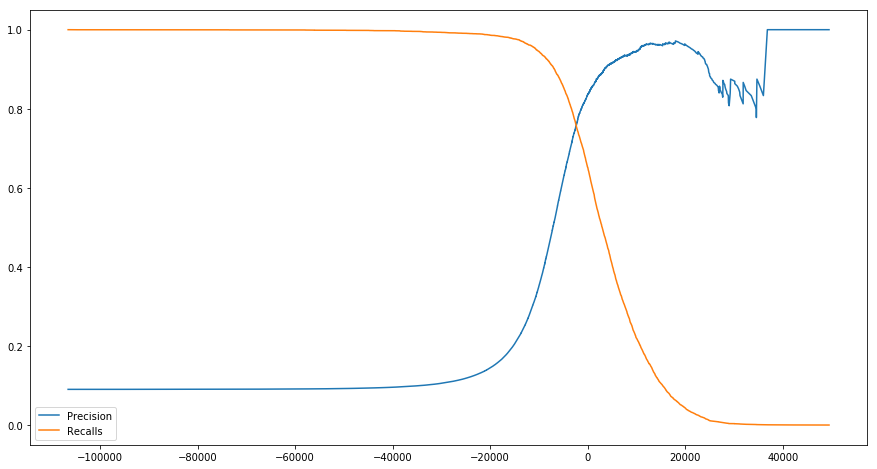

In [66]:
fig,ax=plt.subplots(figsize=(15,8))
precision_recall_threshols(precisions,recalls,thresholds)

ax.legend()

Text(0,0.5,'Precisions')

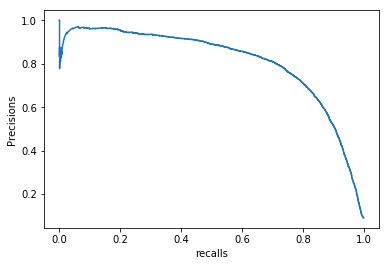

In [67]:
plt.plot(recalls[:-1],precisions[:-1],label="Precision")
plt.xlabel('recalls')
plt.ylabel('Precisions')

In [68]:
thresholds_90_percent= thresholds[np.argmax(precisions >= 0.90)]

In [69]:
np.argmax(precisions>0.90)

57075

In [70]:
np.argmax(precisions >=0.90)

57075

In [71]:
precisions[57075]

0.9000345901072293

In [72]:
pl=precisions.tolist()

In [73]:
thresholds[57075]

3370.0194991439557

In [74]:
y_train_pred_90=(y_scores>thresholds_90_percent)

In [75]:
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [76]:
precision_score(y_train_5,y_train_pred_90)

0.9

In [77]:
recall_score(y_train_5,y_train_pred_90)

0.47980077476480354

In [78]:
#ROC CURVES 
##THIS PLOT IS LIKE THE PRECISION/RECALL CURVE
##BUT FOR THIS WE DEAL WITH TRUE POSITIVE RATE TO FALSE POSITIVE RATE
##TO GET THIS CURVE WE use sklearn roc_curve
## a classifier with curve far away from the line is considered a good classifier
#one way to measure our classifier is the area under the curve
## a perfect classifier will have auc=1 and a random one will have auc=0.5

from sklearn.metrics import  roc_curve


fpr,tpr,threshold= roc_curve(y_train_5,y_scores)

Text(0,0.5,'True Positive Rate(Recall)')

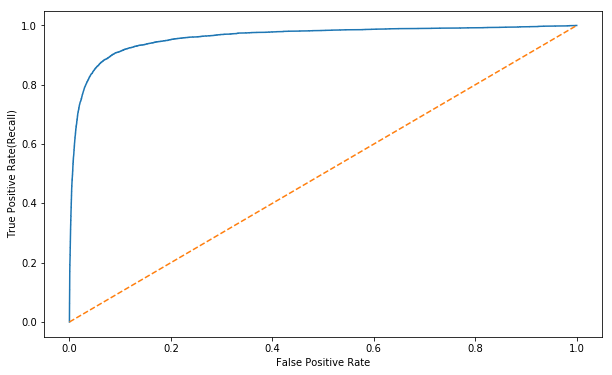

In [79]:
fig,ax=plt.subplots(figsize=(10,6))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate(Recall)')

In [80]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [81]:
#Since the ROC curve is so similar to the precision/recall (or PR)
#curve, you may wonder how to decide which one to use. As a rule
#of thumb, you should prefer the PR curve whenever the positive
#class is rare or when you care more about the false positives than
#the false negatives, and the ROC curve otherwise. For example,
#looking at the previous ROC curve (and the ROC AUC score), you
#may think that the classifier is really good. But this is mostly
#because there are few positives (5s) compared to the negatives
#(non-5s). In contrast, the PR curve makes it clear that the classifier
#has room for improvement (the curve could be closer to the topright
#corner).


In [82]:
from sklearn.ensemble import RandomForestClassifier

rcl=RandomForestClassifier(random_state=42)

In [83]:
y_scores=cross_val_predict(sgdcl,X_train,y_train_5,cv=3,method='decision_function')

In [84]:
y_forest_prob_score=cross_val_predict(rcl,X_train,y_train_5,cv=3,method='predict_proba')

In [85]:
y_forest_score=y_forest_prob_score[:,1]

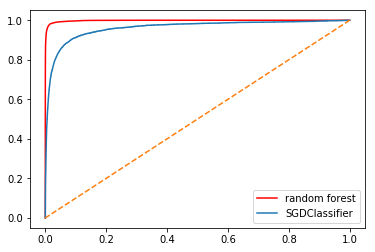

In [86]:
fpr_forest,tpr_forest,threshold_forest=roc_curve(y_train_5,y_forest_score)

plt.plot(fpr_forest,tpr_forest,color='r',label='random forest')
plt.plot(fpr,tpr,label='SGDClassifier')
plt.plot([1,0],[1,0],'--')
plt.legend()
plt.show()

In [87]:
roc_auc_score(y_train_5,y_forest_score)

0.9983436731328145

# MultiClass Classification

In [88]:
#in the codes above we were working on a binary classification
#what is a binary classification? 
#Binary classification is the task of classifying the elements of a set into two groups on the basis of a classification rule.
#inshort either 5 or no 5 
##but for this we are looking to classify more than one element
##so lets say we want to classify images/digits from 0-9
##so how do we do it 
##there are two ways

##step1. so inorder to classify 0 to 9, i will decide to use a binary classification algorithim and classify the numbers
#one after the other
#means , i will get 10 classifiers.
##out of this i will decide to choose the highest score from the highest classifier 
##this is lay man definition of One Versus All

##book definition:Whereas binary classifiers distinguish between two classes, multiclass classifiers (also
#called multinomial classifiers) can distinguish between more than two classes.
#Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are
#capable of handling multiple classes directly. Others (such as Support Vector Machine
#classifiers or Linear classifiers) are strictly binary classifiers. However, there are various
#strategies that you can use to perform multiclass classification using multiple
#binary classifiers.

#For example, one way to create a system that can classify the digit images into 10
#classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a
#1-detector, a 2-detector, and so on). Then when you want to classify an image, you get
#the decision score from each classifier for that image and you select the class whose
#classifier outputs the highest score. This is called the one-versus-all (OvA) strategy
#(also called one-versus-the-rest).


###the next one be the one vesus one starategy 
##this one you do your clsddifications in pairs so lets say you want to classify same 10 images(0-9)
##here the binary classifier will be trained to identify these pairs 0's and 1,0's and 2's 1and 2's and so on.
##so for the 10 we get 45 classifiers.. eeeeeei why??
##N x (N-1)/2 we use this formular.

#Book definition:
#Another strategy is to train a binary classifier for every pair of digits: one to distinguish
#0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on.
#This is called the one-versus-one (OvO) strategy. If there are N classes, you need to
#train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45
#binary classifiers! When you want to classify an image, you have to run the image
#through all 45 classifiers and see which class wins the most duels.



#Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass
#classification task, and it automatically runs OvA (except for SVM classifiers for
#which it uses OvO)

In [89]:
##this is a linear classifier
##hence used for binary
##but since we are using of multiclass
##sklearn will automatically swith to OVA 

##ONLY with SVM it uses OVO

sgdcl.fit(X_train,y_train)
sgdcl.predict([some_data])

array([3], dtype=uint8)

In [90]:

some_digit_score=sgdcl.decision_function([some_data])

In [91]:
some_digit_score

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [92]:
np.argmax(some_digit_score)

3

In [93]:
sgdcl.classes_[3]

3

In [94]:
###so lets force sgdcl to usse ONEVONE
##we can call from sklearn OnevOne and OnevRest 
##lets see


from sklearn.multiclass import  OneVsOneClassifier

ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))

ovo_clf.fit(X_train,y_train)

ovo_clf.predict([some_data])

array([5], dtype=uint8)

In [95]:
len(ovo_clf.estimators_)

45

In [96]:
##now lets use it on RandomForesTcLASSIFIRE
##REMEBER this is not linear hence it wont use binary and no need to force it to use OVO or OVA 
##random classifiers can do multiclass
from sklearn.ensemble import RandomForestClassifier

forest_score=RandomForestClassifier(random_state=42)

forest_score.fit(X_train,y_train)
forest_score.predict([some_data])

array([5], dtype=uint8)

In [97]:
forest_score.predict_proba([some_data])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [98]:
### from here we can see that on the 5th index it predicted 90% that this is a 5

In [99]:
### so lets evaluate our classifiers 
##remeber in the binary part we said its not advisable to use cross_val_score, use cross_val_pred
##but this is the multiclass part so we can go ahead and use it


from sklearn.model_selection import cross_val_score

score__=cross_val_score(sgdcl,X_train,y_train,cv=3,scoring="accuracy")


In [100]:
score__

array([0.87365, 0.85835, 0.8689 ])

In [101]:
##now lets scale this 
##so lets say we want all of them to be same

from sklearn.preprocessing import  StandardScaler
scaler=StandardScaler()

X_trained_scaled=scaler.fit_transform(X_train.astype(float))

In [102]:
cross_val_score(sgdcl,X_trained_scaled,y_train,cv=3,scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [103]:
##Now lets to the gridsearchcv to find the best model and parameters to use
#for the multiclass classifiers
##our two main ones are the 
##RandomForestClassifier
## and the sgdcl X_scaled

from sklearn.model_selection import GridSearchCV

param_grid=[{'n_estimators':[10,30,80], 'max_features':[2,4,6,8]},
            {'bootstrap': [False],'n_estimators':[20,40,60,90],'max_features':[5,7,9,10],'min_impurity_decrease':[0.5]}
            
           ]


random_forest_class=RandomForestClassifier()

grid_search=GridSearchCV(random_forest_class,param_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True)


grid_search.fit(X_trained_scaled,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [10, 30, 80]},
                         {'bootstrap': [False], 'max_features': [5, 7, 9, 10],
                          'min_impurity_decrease': [0.5],
                          'n_estimators': [20, 40, 60, 90]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [104]:
grid_search.best_estimator_

RandomForestClassifier(max_features=6, n_estimators=80)

In [105]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 80}

In [106]:
cvresult=grid_search.cv_results_

In [107]:
for mean_score,params in zip(cvresult['mean_test_score'],cvresult['params']):
    print (np.sqrt(-mean_score),params)

1.3000833306625643 {'max_features': 2, 'n_estimators': 10}
0.9972127823756238 {'max_features': 2, 'n_estimators': 30}
0.9045440840556087 {'max_features': 2, 'n_estimators': 80}
1.219815559828616 {'max_features': 4, 'n_estimators': 10}
0.956983106782281 {'max_features': 4, 'n_estimators': 30}
0.8751476065975005 {'max_features': 4, 'n_estimators': 80}
1.1646029366269004 {'max_features': 6, 'n_estimators': 10}
0.9371677188920525 {'max_features': 6, 'n_estimators': 30}
0.8335966250731425 {'max_features': 6, 'n_estimators': 80}
1.123543501605523 {'max_features': 8, 'n_estimators': 10}
0.9095969803526541 {'max_features': 8, 'n_estimators': 30}
0.84 {'max_features': 8, 'n_estimators': 80}
4.503043415291485 {'bootstrap': False, 'max_features': 5, 'min_impurity_decrease': 0.5, 'n_estimators': 20}
4.503043415291485 {'bootstrap': False, 'max_features': 5, 'min_impurity_decrease': 0.5, 'n_estimators': 40}
4.503043415291485 {'bootstrap': False, 'max_features': 5, 'min_impurity_decrease': 0.5, 'n_es

In [108]:
random_forest_class.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [109]:
grid_search.best_estimator_.fit(X_train,y_train)

RandomForestClassifier(max_features=6, n_estimators=80)

In [110]:
grid_search.best_estimator_.predict([some_data])

array([5], dtype=uint8)

In [111]:
y_train_pred_2=cross_val_predict(sgdcl,X_trained_scaled,y_train,cv=3)

In [112]:
conf_mx=confusion_matrix(y_train,y_train_pred_2)

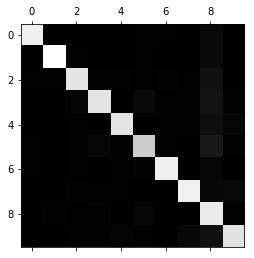

In [125]:


plt.matshow(conf_mx,cmap='Greys_r')

In [131]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

In [134]:
###You see the map?
##this will help us analyze our errors
##the rows are the actual classes
##and the columns are the predicted values
##now check the 5 row and column
##realize it's darker 
##so is the 3 
##so it tells us that our classifier is wrongly classifying 5 

##so we want to focus on the error
##how do we do this 

rows_sum=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/rows_sum

In [135]:
norm_conf_mx

array([[9.41583657e-01, 0.00000000e+00, 3.71433395e-03, 8.44166807e-04,
        1.35066689e-03, 7.25983454e-03, 6.07800101e-03, 1.01300017e-03,
        3.79875063e-02, 1.68833361e-04],
       [0.00000000e+00, 9.49273213e-01, 5.48798576e-03, 3.55977455e-03,
        5.93295758e-04, 6.52625334e-03, 5.93295758e-04, 1.03826758e-03,
        3.14446752e-02, 1.48323939e-03],
       [4.53172205e-03, 4.53172205e-03, 8.76132931e-01, 1.54414233e-02,
        1.22524337e-02, 4.53172205e-03, 1.12453844e-02, 6.04229607e-03,
        6.34441088e-02, 1.84625713e-03],
       [3.58832164e-03, 2.77279400e-03, 1.90833469e-02, 8.52552602e-01,
        3.26211059e-04, 3.31104224e-02, 4.40384929e-03, 6.52422117e-03,
        6.57315283e-02, 1.19067036e-02],
       [2.05409106e-03, 2.39643958e-03, 7.01814447e-03, 1.54056830e-03,
        8.87024991e-01, 2.05409106e-03, 5.81992468e-03, 4.62170490e-03,
        5.93974666e-02, 2.80725779e-02],
       [4.98063088e-03, 2.76701716e-03, 5.53403431e-03, 3.09905921e-02,
   

In [136]:
##now lets fill the digonals with 0's so we get only the errors
np.fill_diagonal(norm_conf_mx,0)

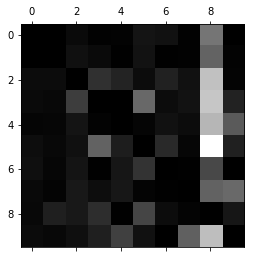

In [139]:
cplt.matshow(norm_conf_mx,cmap='Greys_r')

In [155]:
cl_a,cl_b=3,5


X_aa=X_train[(y_train==cl_a) & (y_train_pred_2==cl_a)]
X_ab=X_train[(y_train==cl_a) & (y_train_pred_2==cl_b)]
X_ba=X_train[(y_train==cl_b) & (y_train_pred_2==cl_a)]
X_bb=X_train[(y_train==cl_b) & (y_train_pred_2==cl_b)]

In [163]:
###TRY AND UNDERSTAND THIS LATER


def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [169]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

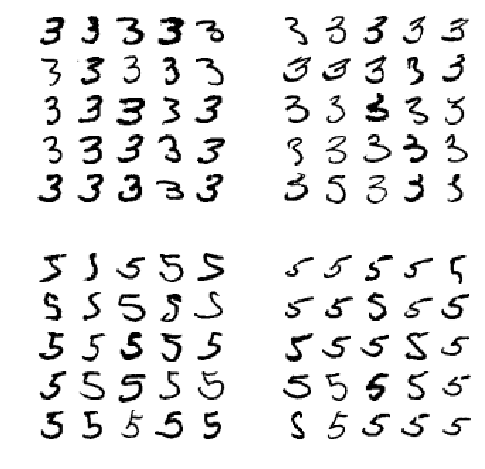

In [171]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

# MultipleLabel Classification


In [172]:
###so lets say we want to classify more than one input
##eg: we have  pictures Bob Alic Charles and we have trained our model recognize these faces
## and in a picture we get only Bob Alice and Charles
## and classifier will return[1,0,1]
##this is exactly what we mean 
##so lets use our data for some illustration

y_train_large=(y_train >7)
y_train_odd=(y_train % 2==1)

y_multilabel=np.c_[y_train_large,y_train_odd]

In [173]:
### so lets use KNNCLASSIFIER
##this one is able to recognize multilables

from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()

In [174]:
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [175]:
knn_clf.predict([some_data])

array([[False,  True]])

In [176]:
y_nn_pred=cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)

In [177]:
f1_score(y_multilabel,y_nn_pred,average='macro')

0.9705516699095764

In [178]:
f1_score(y_multilabel,y_nn_pred,average='weighted')

0.9756028197744341